In [59]:
# 主成分分析の概説

# 「主成分分析」とは、多変量の情報を少数個の「主成分」と呼ばれる合成変数で記述する方法であり、
# 情報の縮約、次元削減を目的とした手法である。高次元に配置されたデータについて、これらのばらつきが
# 少数個の主成分からなる低次元空間内でできるだけ再現できるようにする。
# したがって、合成変数がつくる主成分の分散最大化と、主成分間の無相関化(直行化)が必要な手続きである。
# この手続きは、固有値と固有ベクトルを求めること、より正確には、対称行列の直行行列による対角化の原理によって実現できる。
# データの単位がそろっている場合には、分散共分散行列と相関行列のどちらを使って主成分分析してもよい。
# しかし、単位がそろっていない場合は分析結果が単位に依存するため、相関行列を使って無単位化を行った主成分分析がのぞましい。

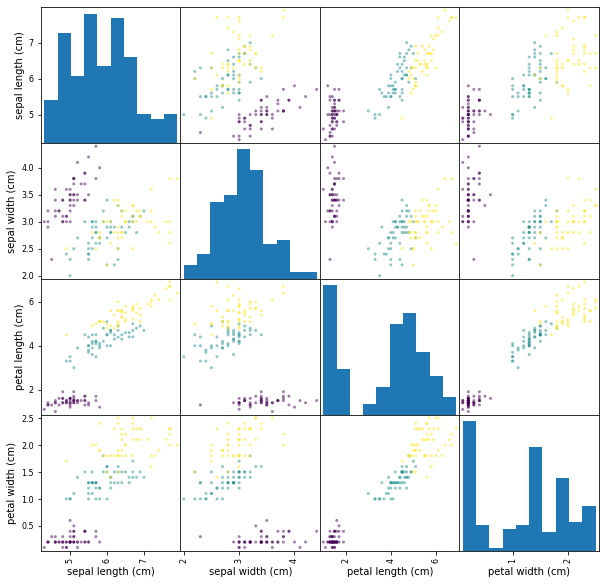

In [60]:
# 標本の分散共分散行列と相関行列

# 標本の分散と共分散を並べたp*p行列を「標本分散共分散行列」、
# 標本相関係数を並べたp*p行列を「標本相関行列」という。
# それぞれ対称行列となっている。また標本相関行列の対角成分は1となる

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# irisデータセットで標本分散共分散行列と標本相関行列を表示
iris = load_iris()
iris_df = pd.DataFrame(
        iris.data,
        columns=iris.feature_names,
    )

pd.plotting.scatter_matrix(iris_df, figsize=(10, 10), c=iris.target)
plt.show()

In [61]:
# 標本分散共分散行列の表示
iris_df.cov()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.685694,-0.042434,1.274315,0.516271
sepal width (cm),-0.042434,0.189979,-0.329656,-0.121639
petal length (cm),1.274315,-0.329656,3.116278,1.295609
petal width (cm),0.516271,-0.121639,1.295609,0.581006


In [62]:
# 標本相関行列の表示
iris_df.corr().style.background_gradient(axis=None)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


     contribution_ratio
PC1            0.924619
PC2            0.053066
PC3            0.017103
PC4            0.005212


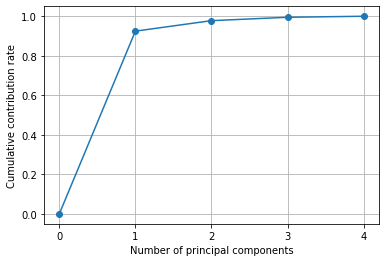

In [63]:
# 主成分、寄与率、実対称行列の固有値問題

# 分散共分散行列Sを直行行列U=(u1,..,up)で対角化する。
# U**T*S*U = diag(λ1,..,λp), λ1>=λ2>=..>=λp>=0
# 両辺のトレースをとると
# tr(U**T*S*U) = tr(S*U*U**T) = tr(S) = Σsjjと固有値の和Σλiが等しくなるので、
# 各固有値λiがどの程度元のデータ行列の分散を反映できるかを示す情報量となる。
# このことを利用して次元削減した際の情報量や寄与率を定めることができる。
# j番目の固有値λjに対応する固有ベクトルujと元の変数x=(x1,..,xp)**Tとの内積を変数yjで表し、
# 第j「主成分」という。 yj = <uj, x> = x1*u1j+..+xp*upj
# また、cj = λj/(λ1+..+λp)を第j主成分の「寄与率」という
# xi = (xi1,..xip)**T あるいは、中心化されたxi = (xi1-x.1_bar,..,xip-x.p_bar)**Tについて主成分に代入した
# {yij = <xi,uj> | i=1,..,n ,j=1,..,p}を「主成分得点」という。
# 第1と第2主成分の主成分をとると、{(y11,y12),..,(yn1,yn2)} でn個の個体が2次元に図示できる。
# 主成分(yj)の持つ意味は、固有ベクトル(uj)の成分の大きさや符号からある程度把握できるが、
# 定量的な指標として主成分と元の変数(xk)との相関係数を求めると、主成分に影響する変数の特定に有効である。
# 元の変数と主成分の相関係数を「主成分負荷量」という。

# irisデータで主成分分析を実行
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(iris_df)

# 寄与率の計算
import numpy as np

contribution_ratios = pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(iris_df.columns))], columns=["contribution_ratio"])
print(contribution_ratios)

# 累積寄与率を図示
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list(np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

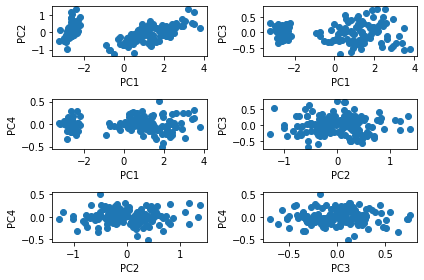

In [64]:
# 主成分得点のプロット

pca_row = pca.transform(iris_df) # データを主成分に変換

fig = plt.figure()

pc_1_2 = fig.add_subplot(3, 2, 1)
pc_1_3 = fig.add_subplot(3, 2, 2)
pc_1_4 = fig.add_subplot(3, 2, 3)
pc_2_3 = fig.add_subplot(3, 2, 4)
pc_2_4 = fig.add_subplot(3, 2, 5)
pc_3_4 = fig.add_subplot(3, 2, 6)

# PC1とPC2
pc_1_2.scatter(pca_row[:, 0], pca_row[:, 1])
pc_1_2.set_xlabel("PC1")
pc_1_2.set_ylabel("PC2")

# PC1とPC3
pc_1_3.scatter(pca_row[:, 0], pca_row[:, 2])
pc_1_3.set_xlabel("PC1")
pc_1_3.set_ylabel("PC3")

# PC1とPC4
pc_1_4.scatter(pca_row[:, 0], pca_row[:, 3])
pc_1_4.set_xlabel("PC1")
pc_1_4.set_ylabel("PC4")

# PC2とPC3
pc_2_3.scatter(pca_row[:, 1], pca_row[:, 2])
pc_2_3.set_xlabel("PC2")
pc_2_3.set_ylabel("PC3")

# PC2とPC4
pc_2_4.scatter(pca_row[:, 1], pca_row[:, 3])
pc_2_4.set_xlabel("PC2")
pc_2_4.set_ylabel("PC4")

# PC3とPC4
pc_3_4.scatter(pca_row[:, 2], pca_row[:, 3])
pc_3_4.set_xlabel("PC3")
pc_3_4.set_ylabel("PC4")

fig.tight_layout() 
plt.show()

In [65]:
# 主成分負荷量の計算
loadings = pd.DataFrame(pca.components_.T, columns=["PC{}".format(x + 1) for x in range(len(iris_df.columns))], index=iris_df.columns)
loadings

,PC1,PC2,PC3,PC4
sepal length (cm),0.361387,0.656589,-0.582030,-0.315487
sepal width (cm),-0.084523,0.730161,0.597911,0.319723
petal length (cm),0.856671,-0.173373,0.076236,0.479839
petal width (cm),0.358289,-0.075481,0.545831,-0.753657


[0.92461872 0.05306648 0.01710261 0.00521218]


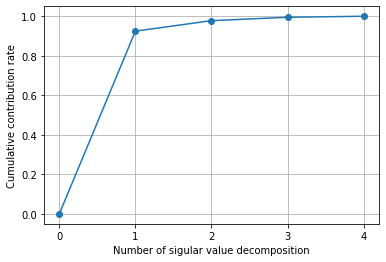

In [72]:
# 平均偏差行列の特異値分解

# 主成分分析における主成分の打ち切りと、Xもしくは平均偏差行列Xcの特異値分解による打ち切りは同じ情報をもつ

import numpy.linalg as LA

# 平均偏差行列
iris_diff_df = iris_df - iris_df.mean()

# 特異値分解を実行
import numpy.linalg as LA
U, S, Vt = LA.svd(iris_diff_df)

S_2 = np.square(S)
lmd_svd = S_2/(len(iris_diff_df)-1)
S_resize = lmd_svd/lmd_svd.sum()
print(S_resize)

plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list(np.cumsum(S_resize)), "-o")
plt.xlabel("Number of sigular value decomposition")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show() # 固有値と特異値が対応していることがわかる

In [67]:
# 自己符号化器

# 自己符号化器(autoencoder)はニューラルネットワークモデルを用いて
# 主成分分析と同様の分析を非線形関数によって行う手法である
# 入力xから出力zを求める操作を「符号化」、zからx~を求める操作を「複合化」という
# 自己符号化器の目的はx~がxと近くなるようなニューラルネットワークを求めることである

# ※keras、pytorch等で実装が必要なので実装は省略